In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('Mall_Customers.csv',index_col=0)

In [22]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [23]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [24]:
df.shape

(200, 4)

In [25]:
df['Gender']=df.Gender.map({"Female":0,"Male":1})

In [26]:
df.dtypes

Gender                    int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

In [27]:
x = df.values[:,[2,3]]

In [28]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [29]:
from sklearn.cluster import KMeans

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'WSSE')

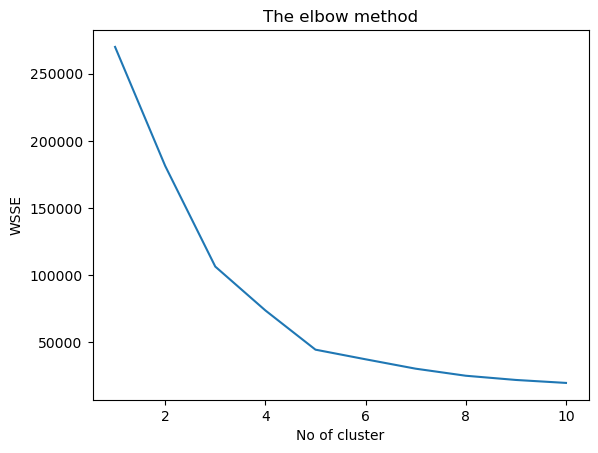

In [30]:
wsse = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=10)
    kmeans.fit(x)
    wsse.append(kmeans.inertia_)
plt.plot(range(1,11),wsse)
plt.title('The elbow method')
plt.xlabel('No of cluster')
plt.ylabel('WSSE')

In [31]:
kmeans = KMeans(n_clusters=5, random_state=10)
y_pred=kmeans.fit_predict(x)

In [32]:
y_pred

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [33]:
df['cluster']=y_pred

In [34]:
df.head(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
CustomerID,,,,,
1,1,19,15,39,3
2,1,21,15,81,0
3,0,20,16,6,3
4,0,23,16,77,0
5,0,31,17,40,3


In [38]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
CustomerID,,,,,
1,1,19,15,39,3
2,1,21,15,81,0
3,0,20,16,6,3
4,0,23,16,77,0
5,0,31,17,40,3
...,...,...,...,...,...
196,0,35,120,79,2
197,0,45,126,28,4
198,1,32,126,74,2


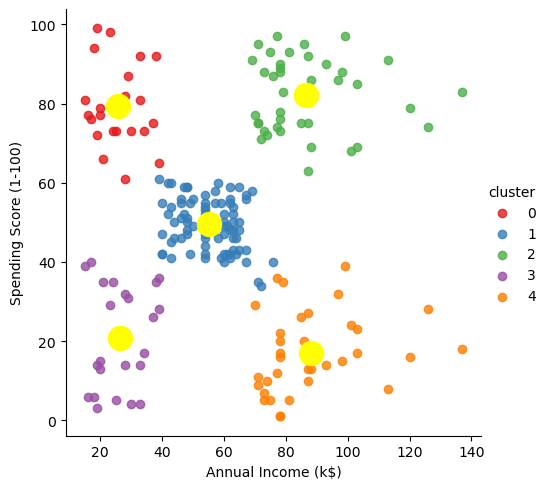

In [44]:
sns.lmplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
           fit_reg=False, hue="cluster", palette='Set1')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='yellow')
plt.show()


In [45]:
df['cluster']=df.cluster.map({0:'standard',1:'sensible',2:'target',3:'careless',4:'careful'})

In [46]:
df1 = df[df['cluster']=='target']

In [49]:
df1.head(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
CustomerID,,,,,
124,1,39,69,91,target
126,0,31,70,77,target
128,1,40,71,95,target
130,1,38,71,75,target
132,1,39,71,75,target


In [50]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
CustomerID,,,,,
1,1,19,15,39,careless
2,1,21,15,81,standard
3,0,20,16,6,careless
4,0,23,16,77,standard
5,0,31,17,40,careless
...,...,...,...,...,...
196,0,35,120,79,target
197,0,45,126,28,careful
198,1,32,126,74,target


In [53]:
df.to_csv("segmented_customer.csv",index=True)